### 던파TV의 플레이리스트 확인

In [26]:
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from oauth2client.tools import argparser
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# pip install oauth2client

In [7]:
api_key = '-'
youtube_api_service_name = 'youtube'
youtube_api_version = 'v3'

youtube = build(youtube_api_service_name, youtube_api_version, developerKey = api_key)

In [8]:
search_response = youtube.search().list(q = '던파TV',
                                       order = 'relevance',
                                       part = 'snippet',
                                       maxResults = 50).execute()

In [9]:
channel_id = search_response['items'][0]['id']['channelId']

In [10]:
channel_id

'UCg80LjrsnWo0T3T3uYCPhrQ'

In [11]:
playlists = youtube.playlists().list(channelId = channel_id,
                                    part = 'snippet',
                                    maxResults = 20).execute()

In [12]:
ids = []
titles = []
for i in playlists['items']:
    ids.append(i['id'])
    titles.append(i['snippet']['title'])
    
df = pd.DataFrame([ids, titles])

In [13]:
df = df.T

In [14]:
df.columns = ['PlayLists', 'Titles']

In [15]:
df

,PlayLists,Titles
0,PLcALRpKkVZ4H-ozlpvJ2yhXB24pcl18Tn,던파TV와 함께하실래요?
1,PLcALRpKkVZ4EbV4o6gEQA_5mjEPQP8mVo,던파걸
2,PLcALRpKkVZ4GDVKAO3UBH41lUHvznsZP-,던파 스토리/세계관
3,PLcALRpKkVZ4EVtdxZ4mM-WG8aBDyUESDq,윤티비
4,PLcALRpKkVZ4EH6d6ygStRwJyG3BhCHcjn,DPL 2021 WINTER
5,PLcALRpKkVZ4ENDaQBlbG_ztXbrYuT29SM,모험가가 뽑은 최애곡 BEST 20
6,PLcALRpKkVZ4GUfaz8d_QwnHYcdxJ7AYim,2022 THE NEXT PLAN
7,PLcALRpKkVZ4Hki_Ud7Kgq7sPZfsMQdc42,DPL 2021 SUMMER
8,PLcALRpKkVZ4GqoR151HpU_6mECJH4IvwL,던파 광고
9,PLcALRpKkVZ4GwWR2sIWxVM_xVvxuayl-h,던파 眞 각성/자각


In [16]:
# pip install resource

### 특정 플레이리스트의 영상목록 가져오기

#### 먼저 영상 타이틀과 각 영상의 id를 가져오기
- '던파 업데이트' 목록의 영상들 불러오기.
- 조회수 경향을 보고 어떤 업데이트가 큰 관심을 가져왔는지 확인해볼 수 있다.

In [17]:
# '던파 업데이트'의 재생목록 영상들

update_videos = df['PlayLists'][11]

playlist_videos = youtube.playlistItems().list(playlistId = update_videos,
                                              part = 'snippet',
                                              maxResults = 50)
playlistitems_list_response = playlist_videos.execute()

video_names = []
video_ids = []
date = []

for v in playlistitems_list_response['items']:
    video_names.append(v['snippet']['title'])
    video_ids.append(v['snippet']['resourceId']['videoId'])
    date.append(v['snippet']['publishedAt'])
    
video_df = pd.DataFrame([date, video_names, video_ids]).T
video_df.columns = ['Date', 'Title', 'IDS']

In [18]:
video_df

,Date,Title,IDS
0,2022-03-16T12:13:37Z,[던파] 시즌 8. THE NEXT JOURNEY,PDdlxwhNW4w
1,2022-01-12T07:05:04Z,[던파] 시즌7 Act 19. Assault : 폭격개시,3jwAqRIYP0Y
2,2021-07-08T01:06:30Z,[던파] 시즌7 Act 18. BLADE : 복수의 여신,kgRsVTwREtM
3,2021-07-05T06:03:28Z,[던파] 시즌7 Act 17. 혼돈의 오즈마,mLkXKC4asp4
4,2021-05-12T06:01:28Z,[던파] 시즌 7 Act 16. 오버타임,QfvaQWpk5NI
5,2021-04-14T08:31:47Z,[던파] 시즌 7 Act 15. 탄환을 스치는 검날,pyrG86thVUA
6,2021-03-17T08:01:48Z,[던파] 시즌 7 Act 14. 굴레를 벗어난 자,7ldWLYXd_tM
7,2021-03-03T08:31:24Z,[던파] 시즌 7 Act 13 외전. 에테르나,VbEOJKJOANQ
8,2021-02-04T00:58:38Z,[던파] 시즌 7 Act 13. 차원을 넘어선 의지,VoNtHuD3L94
9,2021-01-06T08:12:45Z,[던파] 시즌 7 Act 12. 검은 연옥 & 산개하는 총성,pNWeY9HQats


#### 조회수, 좋아요, 영상길이, 제목

In [19]:
# 해당 각 영상들의 정보 수집

import re

ids = []
dates = []
category_id = []
views = []
likes = []
dislikes = []
comments = []
title = []
mins = [] # 분
secs = [] # 초

for i in range(len(video_df)):
    request = youtube.videos().list(part = 'snippet, contentDetails, statistics',
                                   id = video_df['IDS'][i])
    response = request.execute()
    
    if response['items'] == []:
        ids.append('-')
        dates.append('-')
        category_id.append('-')
        views.append('-')
        likes.append('-')
        dislikes.append('-')
        comments.append('-')
        mins.append('-')
        secs.append('-')
    else:
        title.append(response['items'][0]['snippet']['title'])
        ids.append(video_df['IDS'][i])
        dates.append(response['items'][0]['snippet']['publishedAt'].split('T')[0])
        category_id.append(response['items'][0]['snippet']['categoryId'])
        views.append(response['items'][0]['statistics']['viewCount'])
        likes.append(response['items'][0]['statistics']['likeCount'])
        comments.append(response['items'][0]['statistics']['commentCount'])
        
update_videos_df = pd.DataFrame([title, ids, dates, category_id, views, likes, comments]).T
update_videos_df.columns = ['title', 'video_id', 'date', 'category_id', 'views', 'likes', 'comments']

In [20]:
update_videos_df

,title,video_id,date,category_id,views,likes,comments
0,[던파] 시즌 8. THE NEXT JOURNEY,PDdlxwhNW4w,2022-03-16,20,28070,238,111
1,[던파] 시즌7 Act 19. Assault : 폭격개시,3jwAqRIYP0Y,2022-01-12,20,31425,204,70
2,[던파] 시즌7 Act 18. BLADE : 복수의 여신,kgRsVTwREtM,2021-07-07,20,28482,248,322
3,[던파] 시즌7 Act 17. 혼돈의 오즈마,mLkXKC4asp4,2021-05-26,20,61466,380,198
4,[던파] 시즌 7 Act 16. 오버타임,QfvaQWpk5NI,2021-05-12,20,25804,174,119
5,[던파] 시즌 7 Act 15. 탄환을 스치는 검날,pyrG86thVUA,2021-04-14,20,37958,260,127
6,[던파] 시즌 7 Act 14. 굴레를 벗어난 자,7ldWLYXd_tM,2021-03-17,20,42722,327,196
7,[던파] 시즌 7 Act 13 외전. 에테르나,VbEOJKJOANQ,2021-03-03,20,18362,62,229
8,[던파] 시즌 7 Act 13. 차원을 넘어선 의지,VoNtHuD3L94,2021-02-03,20,57605,340,223
9,[던파] 시즌 7 Act 12. 검은 연옥 & 산개하는 총성,pNWeY9HQats,2021-01-06,20,57555,171,56


In [21]:
update_videos_df.to_csv('C:/Users/dhckd/Study/CodingWorld/기술과제들/네오플/던파TV.csv')

In [22]:
df = pd.read_csv('C:/Users/dhckd/Study/CodingWorld/기술과제들/네오플/던파TV.csv', index_col = 0)

In [31]:
df_new = df.sort_values(by = 'date', ascending = True)

In [32]:
df_new

,title,video_id,date,category_id,views,likes,comments
40,시즌 5 Act 1. 건설자 루크,2lk8xXNQ7R4,2016-10-12,20,195567,158,63
39,[시즌 5 Act 2. 검은 성녀] 캐릭터 시네마틱 영상 - 프리스트(여),IdF-CzO5cdQ,2017-01-18,20,92463,140,34
38,[시즌 5 Act 2 외전] 비탄의 탑,slXHCRr6jMc,2017-02-09,20,7282,24,20
37,[시즌 5 Act 3. 구원] 프리스트(여) 2차 각성 프로모션 영상,RZ6xaxndQts,2017-02-22,20,279971,1109,356
36,[시즌 5 Act 4. 전설의 시작] 전설던전 프로모션 영상,GWKGck5zmxQ,2017-03-15,20,48780,156,98
35,[던파] 시즌 5 Act 5. 기사단 집결 프로모션 영상,zUYCOD-s3Dk,2017-07-20,20,366704,155,69
34,[던파] 시즌 5 Act 6. 개선행진 프로모션 영상,10DiLHxxxb8,2017-08-30,20,84630,231,92
33,[시즌 5 Act 7. 오리진] 오리진 프로모션 영상,PZDxec0oG-Y,2017-09-20,20,47787,141,76
32,[던파] 시즌 5 Act 8. 운명을 가르는 창 프로모션 영상,8WO6x-NYlNw,2017-10-25,20,52965,190,72
31,[던파] 시즌 5 Act 9. 마수 프로모션 영상,Cgq4Qp7mEeY,2017-12-27,20,57176,79,85


<BarContainer object of 41 artists>

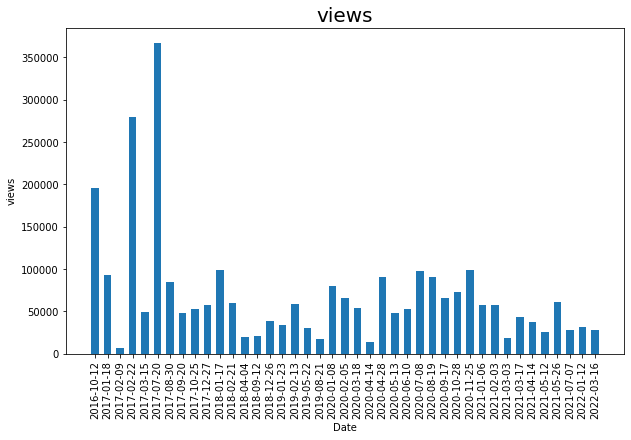

In [38]:
xs = df_new['date']
ys = df_new['views']
plt.figure(figsize=(10, 6)) #그래프 크기 지정
plt.xlabel('Date') #그래프 x축 이름(label) 지정
plt.ylabel('views') #그래프 y축 이름(label) 지정
plt.xticks(rotation = 90)
plt.title('views',fontsize=20) ## 타이틀 설정
plt.bar(xs, ys, width=0.6) #리스트로 저장한 xs와 ys로 막대(bar) 그래프 플롯